In [1]:
import sys
#sys.path

sys.path.append("C:/yoyo/course/3rd/656/hom/week5")
sys.path.append("C:/Users/yoyo0/Downloads/graphviz-2.38/release/bin")
sys.path

['C:\\Users\\yoyo0\\Previous project records\\STAT656',
 'C:\\Users\\yoyo0\\Anaconda3\\python37.zip',
 'C:\\Users\\yoyo0\\Anaconda3\\DLLs',
 'C:\\Users\\yoyo0\\Anaconda3\\lib',
 'C:\\Users\\yoyo0\\Anaconda3',
 '',
 'C:\\Users\\yoyo0\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\yoyo0\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\yoyo0\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\yoyo0\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\yoyo0\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\yoyo0\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\yoyo0\\.ipython',
 'C:/yoyo/course/3rd/656/hom/week5',
 'C:/Users/yoyo0/Downloads/graphviz-2.38/release/bin']

In [2]:
from Class_tree import DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import graphviz
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [3]:
file_path = 'C:/yoyo/course/3rd/656/hom/midterm/'
df = pd.read_excel(file_path+"CreditCard_Defaults.xlsx")
n_obs = df.shape[0]
n_obs

30000

In [4]:
n_interval = 26
n_binary   = 2
n_nominal  = 3
n_cat = n_binary+n_nominal

attribute_map = {
    'Default':[1,(1,0),[0,0]],
    'Gender':[1,(1,2),[0,0]],
    'Education':[2,(0,1,2,3,4,5,6),[0,0]],
    'Marital_Status':[2,(0,1,2,3),[0,0]],
    'card_class':[2,(1,2,3),[0,0]],
    'Age':[0,(20,80),[0,0]],
    'Credit_Limit':[0,(100,80000),[0,0]],
    'Jun_Status':[0,(-2,8),[0,0]],
    'May_Status':[0,(-2,8),[0,0]],
    'Apr_Status':[0,(-2,8),[0,0]],
    'Mar_Status':[0,(-2,8),[0,0]],
    'Feb_Status':[0,(-2,8),[0,0]],
    'Jan_Status':[0,(-2,8),[0,0]],
    'Jun_Bill':[0,(-12000,32000),[0,0]],
    'May_Bill':[0,(-12000,32000),[0,0]],
    'Apr_Bill':[0,(-12000,32000),[0,0]],
    'Mar_Bill':[0,(-12000,32000),[0,0]],
    'Feb_Bill':[0,(-12000,32000),[0,0]],
    'Jan_Bill':[0,(-12000,32000),[0,0]],
    'Jun_Payment':[0,(0,60000),[0,0]],
    'May_Payment':[0,(0,60000),[0,0]],
    'Apr_Payment':[0,(0,60000),[0,0]],
    'Mar_Payment':[0,(0,60000),[0,0]],
    'Feb_Payment':[0,(0,60000),[0,0]],
    'Jan_Payment':[0,(0,60000),[0,0]],
    'Jun_PayPercent':[0,(0,1),[0,0]],
    'May_PayPercent':[0,(0,1),[0,0]],
    'Apr_PayPercent':[0,(0,1),[0,0]],
    'Mar_PayPercent':[0,(0,1),[0,0]],
    'Feb_PayPercent':[0,(0,1),[0,0]],
    'Jan_PayPercent':[0,(0,1),[0,0]]}

In [5]:
initial_missing = df.isnull().sum()
for k,v in attribute_map.items():
    v[2][0] = initial_missing[k]
nan_map = df.isnull()

for i in range(n_obs):
    # Check for outliers in interval attributes
    if i ==0:
        i = i+1
    for k, v in attribute_map.items():
        if nan_map.loc[i,k]==True:
            continue
        if v[0]==0: # Interval Attribute
            l_limit = v[1][0]
            u_limit = v[1][1]
            if df.loc[i,k]>u_limit or df.loc[i,k]<l_limit:
                v[2][1] += 1
                df.loc[i,k] = None
        else: # Categorical Attribute
            in_cat = False
            for cat in v[1]:
                if df.loc[i,k]==cat:
                    in_cat=True
            if in_cat==False:
                df.loc[i,k] = None
                v[2][1] += 1
                
print("\nNumber of missing values and outliers by attribute:")
feature_names = np.array(df.columns.values)
for k,v in attribute_map.items():
    print(k+":\t%i missing" %v[2][0]+ "  %i outlier(s)" %v[2][1])


Number of missing values and outliers by attribute:
Default:	0 missing  0 outlier(s)
Gender:	3083 missing  0 outlier(s)
Education:	4521 missing  0 outlier(s)
Marital_Status:	0 missing  0 outlier(s)
card_class:	0 missing  0 outlier(s)
Age:	5999 missing  0 outlier(s)
Credit_Limit:	0 missing  0 outlier(s)
Jun_Status:	0 missing  0 outlier(s)
May_Status:	0 missing  0 outlier(s)
Apr_Status:	0 missing  0 outlier(s)
Mar_Status:	0 missing  0 outlier(s)
Feb_Status:	0 missing  0 outlier(s)
Jan_Status:	0 missing  0 outlier(s)
Jun_Bill:	0 missing  1 outlier(s)
May_Bill:	0 missing  1 outlier(s)
Apr_Bill:	0 missing  1 outlier(s)
Mar_Bill:	0 missing  0 outlier(s)
Feb_Bill:	0 missing  0 outlier(s)
Jan_Bill:	0 missing  1 outlier(s)
Jun_Payment:	0 missing  0 outlier(s)
May_Payment:	0 missing  0 outlier(s)
Apr_Payment:	0 missing  0 outlier(s)
Mar_Payment:	0 missing  0 outlier(s)
Feb_Payment:	0 missing  0 outlier(s)
Jan_Payment:	0 missing  0 outlier(s)
Jun_PayPercent:	0 missing  0 outlier(s)
May_PayPercen

In [6]:
interval_attributes = []
nominal_attributes  = []
binary_attributes = []
onehot_attributes   = []
for k,v in attribute_map.items():
    if v[0]==0:
        interval_attributes.append(k)
    else:
        if v[0]==1:
            binary_attributes.append(k)
        else:
            nominal_attributes.append(k)
            for i in range(len(v[1])):
                str = k+("%i" %i)
                onehot_attributes.append(str)
            
n_interval = len(interval_attributes)
n_nominal  = len(nominal_attributes)
n_binary = len(binary_attributes)
n_onehot   = len(onehot_attributes)

In [7]:
df.head()

,Customer,Default,card_class,Gender,Education,Marital_Status,Age,Credit_Limit,Jun_Status,May_Status,...,Apr_Payment,Mar_Payment,Feb_Payment,Jan_Payment,Jun_PayPercent,May_PayPercent,Apr_PayPercent,Mar_PayPercent,Feb_PayPercent,Jan_PayPercent
0,1,1,1,2.0,2.0,1,24.0,700,2,2,...,0.00,0.00,0.00,0.00,0.0000,0.2221,0.0000,1.0000,1.0000,1.0000
1,2,0,2,2.0,2.0,2,26.0,4100,-1,2,...,34.20,34.20,0.00,68.40,0.0000,0.5797,0.3729,0.3056,0.0000,0.6133
2,3,0,2,2.0,2.0,2,34.0,3100,0,0,...,34.20,34.20,34.20,171.00,0.0519,0.1069,0.0738,0.0698,0.0669,0.3216
3,4,0,1,2.0,2.0,1,37.0,1700,0,0,...,41.04,37.62,36.56,34.20,0.0426,0.0419,0.0243,0.0388,0.0369,0.0338
4,5,0,1,1.0,2.0,1,57.0,1700,-1,0,...,342.00,307.80,23.56,23.22,0.2321,1.0000,0.2791,0.4298,0.0360,0.0355


In [8]:
print("Original DataFrame:\n", df[0:5])
# Put the interval data from the dataframe into a numpy array
interval_data = df.as_matrix(columns=interval_attributes)
# Create the Imputer for the Interval Data
interval_imputer = preprocessing.Imputer(strategy='mean')
# Impute the missing values in the Interval data
imputed_interval_data = interval_imputer.fit_transform(interval_data)

Original DataFrame:
    Customer  Default  card_class  Gender  Education  Marital_Status   Age  \
0         1        1           1     2.0        2.0               1  24.0   
1         2        0           2     2.0        2.0               2  26.0   
2         3        0           2     2.0        2.0               2  34.0   
3         4        0           1     2.0        2.0               1  37.0   
4         5        0           1     1.0        2.0               1  57.0   

   Credit_Limit  Jun_Status  May_Status  ...  Apr_Payment  Mar_Payment  \
0           700           2           2  ...         0.00         0.00   
1          4100          -1           2  ...        34.20        34.20   
2          3100           0           0  ...        34.20        34.20   
3          1700           0           0  ...        41.04        37.62   
4          1700          -1           0  ...       342.00       307.80   

   Feb_Payment  Jan_Payment  Jun_PayPercent  May_PayPercent  Apr_PayPer

C:\Users\yoyo0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yoyo0\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
# Put the nominal and binary data from the dataframe into a numpy array
nominal_data = df.as_matrix(columns=nominal_attributes)
binary_data  = df.as_matrix(columns=binary_attributes)
# Create Imputer for Categorical Data
cat_imputer = preprocessing.Imputer(strategy='most_frequent')
# Impute the missing values in the Categorical Data
imputed_nominal_data = cat_imputer.fit_transform(nominal_data)
imputed_binary_data  = cat_imputer.fit_transform(binary_data)

C:\Users\yoyo0\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\yoyo0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yoyo0\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
import seaborn as sns
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
#     plt.show()

count    30000.000000
mean         0.161800
std          0.368273
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Default, dtype: float64
mode:  0    0
dtype: int64
0    25146
1     4854
Name: Default, dtype: int64


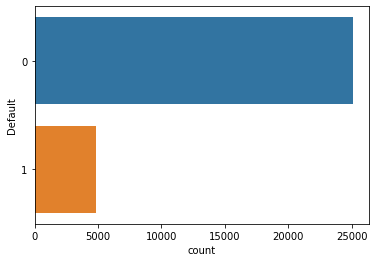

In [17]:
# Target Variable: Survival
c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(df, y = 'Default', palette=c_palette)

count    26917.000000
mean         1.604042
std          0.489065
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Gender, dtype: float64
mode:  0    2.0
dtype: float64
2.0    16259
1.0    10658
Name: Gender, dtype: int64


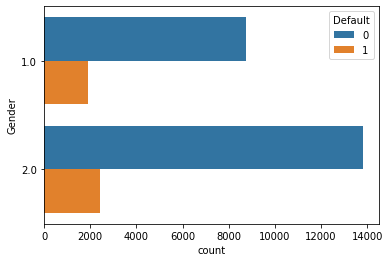

In [20]:
# Feature Variable: Gender
categorical_summarized(df, y = 'Gender', hue='Default', palette=c_palette)

In [9]:
# Encoding Interval Data by Scaling
scaler = preprocessing.StandardScaler() # Create an instance of StandardScaler()
scaler.fit(imputed_interval_data)
scaled_interval_data = scaler.transform(imputed_interval_data)

In [10]:
# Create an instance of the OneHotEncoder & Selecting Attributes
onehot = preprocessing.OneHotEncoder()
hot_array = onehot.fit_transform(imputed_nominal_data).toarray()

In [11]:
data_array= np.hstack((imputed_interval_data,imputed_nominal_data,imputed_binary_data))
col = []
for i in range(n_interval):
    col.append(interval_attributes[i])
for i in range(n_nominal):
    col.append(nominal_attributes[i])
for i in range(n_binary):
    col.append(binary_attributes[i])
df_imputed = pd.DataFrame(data_array,columns=col)
print("\nImputed DataFrame:\n", df_imputed[0:15])


Imputed DataFrame:
           Age  Credit_Limit  Jun_Status  May_Status  Apr_Status  Mar_Status  \
0   24.000000         700.0         2.0         2.0        -1.0        -1.0   
1   26.000000        4100.0        -1.0         2.0         0.0         0.0   
2   34.000000        3100.0         0.0         0.0         0.0         0.0   
3   37.000000        1700.0         0.0         0.0         0.0         0.0   
4   57.000000        1700.0        -1.0         0.0        -1.0         0.0   
5   37.000000        1700.0         0.0         0.0         0.0         0.0   
6   29.000000       17100.0         0.0         0.0         0.0         0.0   
7   23.000000        3400.0         0.0        -1.0        -1.0         0.0   
8   28.000000        4800.0         0.0         0.0         2.0         0.0   
9   35.000000         700.0        -2.0        -2.0        -2.0        -2.0   
10  35.493813        6800.0         0.0         0.0         2.0         0.0   
11  35.493813        8900.0    

In [25]:
# The Imputed and Encoded Data
data_array = np.hstack((scaled_interval_data, hot_array, imputed_binary_data))
#col = (interval_attributes, cat_attributes)
col = []
for i in range(n_interval):
    col.append(interval_attributes[i])
for i in range(n_onehot):
    col.append(onehot_attributes[i])
for i in range(n_binary):
    col.append(binary_attributes[i])
df_imputed_scaled = pd.DataFrame(data_array,columns=col)
df_imputed_scaled_lgr = df_imputed_scaled.drop(['Education6','Marital_Status3','card_class2'], axis = 1) 
print("\nImputed & Scaled DataFrame:\n", df_imputed_scaled.head(),)
print("\nImputed & Scaled lgr DataFrame:\n", df_imputed_scaled_lgr.head())


Imputed & Scaled DataFrame:
         Age  Credit_Limit  Jun_Status  May_Status  Apr_Status  Mar_Status  \
0 -1.391899     -1.131883    1.794564    1.782348   -0.696663   -0.666599   
1 -1.149700     -0.366111   -0.874991    1.782348    0.138865    0.188746   
2 -0.180901     -0.591338    0.014861    0.111736    0.138865    0.188746   
3  0.182399     -0.906656    0.014861    0.111736    0.138865    0.188746   
4  2.604397     -0.906656   -0.874991    0.111736   -0.696663    0.188746   

   Feb_Status  Jan_Status  Jun_Bill  May_Bill   ...    Education6  \
0   -1.530046   -1.486041 -0.643742 -0.648829   ...           0.0   
1    0.234917    1.992316 -0.660503 -0.668231   ...           0.0   
2    0.234917    0.253137 -0.298915 -0.494888   ...           0.0   
3    0.234917    0.253137 -0.057224 -0.012891   ...           0.0   
4    0.234917    0.253137 -0.579693 -0.612646   ...           0.0   

   Marital_Status0  Marital_Status1  Marital_Status2  Marital_Status3  \
0              0.0 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from Class_regression import logreg
y = np.asarray(df_imputed_scaled_lgr['Default']) 
X = np.asarray(df_imputed_scaled_lgr.drop('Default',axis=1))
lgr = LogisticRegression()
lgr.fit(X, y)
print("\nLogistic Regression Model using Entire Dataset")
logreg.display_coef(lgr, 38, 2, col)
logreg.display_binary_metrics(lgr, X, y)


Logistic Regression Model using Entire Dataset

Coefficients:
Intercept......        -1.6860
Age............         0.0646
Credit_Limit...        -0.2967
Jun_Status.....         0.7535
May_Status.....         0.3222
Apr_Status.....         0.1002
Mar_Status.....         0.0978
Feb_Status.....         0.1419
Jan_Status.....         0.1726
Jun_Bill.......        -0.2220
May_Bill.......         0.3994
Apr_Bill.......        -0.1362
Mar_Bill.......         0.1415
Feb_Bill.......        -0.0504
Jan_Bill.......         0.0429
Jun_Payment....        -0.2446
May_Payment....        -0.1746
Apr_Payment....        -0.0686
Mar_Payment....        -0.0492
Feb_Payment....        -0.1571
Jan_Payment....        -0.0350
Jun_PayPercent.         0.2483
May_PayPercent.         0.1631
Apr_PayPercent.        -0.0018
Mar_PayPercent.         0.1200
Feb_PayPercent.         0.1878
Jan_PayPercent.         0.0613
Education0.....        -0.5484
Education1.....         0.2830
Education2.....         0.2176
Educati

In [28]:
from sklearn.neural_network  import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
y = np.asarray(df_imputed_scaled['Default']) 
X = np.asarray(df_imputed_scaled.drop('Default',axis=1))
np_y = np.ravel(y)
network_list = [(3),(4),(5),(6),(7),(8),(9), (11),(3,2),(4,3),(5,4), (6,5), (7,6),(8,7),(9,8),(10,10)]
score_list = ['accuracy', 'recall', 'precision', 'f1']
for nn in network_list:
    print("\nNetwork: ", nn)
    fnn = MLPClassifier(hidden_layer_sizes=nn, activation='logistic', \
                    solver='lbfgs', max_iter=1000, random_state=12345)
    fnn = fnn.fit(X,np_y)
    scores = cross_validate(fnn, X, np_y, scoring=score_list, \
                            return_train_score=False, cv=10)
    
    print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
    for s in score_list:
        var = "test_"+s
        mean = scores[var].mean()
        std  = scores[var].std()
        print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))
        


Network:  3
Metric.......  Mean    Std. Dev.
accuracy..... 0.8713    0.0069
recall....... 0.4073    0.0459
precision.... 0.6708    0.0434
f1........... 0.5048    0.0352

Network:  4
Metric.......  Mean    Std. Dev.
accuracy..... 0.8727    0.0087
recall....... 0.4415    0.0399
precision.... 0.6616    0.0480
f1........... 0.5284    0.0345

Network:  5
Metric.......  Mean    Std. Dev.
accuracy..... 0.8736    0.0074
recall....... 0.4463    0.0343
precision.... 0.6641    0.0409
f1........... 0.5329    0.0293

Network:  6
Metric.......  Mean    Std. Dev.
accuracy..... 0.8714    0.0075
recall....... 0.4275    0.0274
precision.... 0.6601    0.0438
f1........... 0.5181    0.0256

Network:  7
Metric.......  Mean    Std. Dev.
accuracy..... 0.8719    0.0076
recall....... 0.4347    0.0339
precision.... 0.6598    0.0452
f1........... 0.5230    0.0297

Network:  8
Metric.......  Mean    Std. Dev.
accuracy..... 0.8724    0.0077
recall....... 0.4407    0.0398
precision.... 0.6604    0.0443
f1.........

In [14]:
from Class_tree import DecisionTree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
y = df_imputed_scaled['Default']
X = df_imputed_scaled.drop('Default',axis=1)
print("\n******** Decision Tree ********")

features = np.array(X.columns.values)
classes = ['1','0']

X_train, X_validate, y_train, y_validate = \
            train_test_split(X,y,test_size = 0.3, random_state=12345)

# Cross Validation
depth_list = [3, 4, 5, 6, 7, 8, 10, 15, 25, 30, 35]
score_list = ['accuracy', 'recall', 'precision', 'f1']

for d in depth_list:
    print("\nMaximum Tree Depth: ", d)
    dtc = DecisionTreeClassifier(max_depth=d, min_samples_leaf=5, min_samples_split=5)
    dtc = dtc.fit(X,y)
    scores = cross_validate(dtc, X, y, scoring=score_list, \
                            return_train_score=False, cv=10)
    print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
    for s in score_list:
        var = "test_" + s
        mean = scores[var].mean()
        std = scores[var].std()
        print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))



******** Decision Tree ********

Maximum Tree Depth:  3
Metric.......  Mean    Std. Dev.
accuracy..... 0.8750    0.0068
recall....... 0.4156    0.0309
precision.... 0.6894    0.0402
f1........... 0.5178    0.0291

Maximum Tree Depth:  4
Metric.......  Mean    Std. Dev.
accuracy..... 0.8748    0.0077
recall....... 0.4565    0.0333
precision.... 0.6664    0.0408
f1........... 0.5410    0.0299

Maximum Tree Depth:  5
Metric.......  Mean    Std. Dev.
accuracy..... 0.8741    0.0071
recall....... 0.4479    0.0403
precision.... 0.6679    0.0449
f1........... 0.5345    0.0302

Maximum Tree Depth:  6
Metric.......  Mean    Std. Dev.
accuracy..... 0.8751    0.0066
recall....... 0.4510    0.0384
precision.... 0.6711    0.0363
f1........... 0.5382    0.0301

Maximum Tree Depth:  7
Metric.......  Mean    Std. Dev.
accuracy..... 0.8737    0.0069
recall....... 0.4438    0.0341
precision.... 0.6663    0.0392
f1........... 0.5315    0.0275

Maximum Tree Depth:  8
Metric.......  Mean    Std. Dev.
accur

In [18]:
print("\n******** RANDOM FOREST ********")

estimators_list = [27, 35, 45, 55, 60, 65, 70, 75, 80]
max_features_list = [0.3, 0.5, 0.8]
score_list = ['accuracy', 'recall', 'precision', 'f1']
max_f1 = 0
for e in estimators_list:
    for f in max_features_list:
        print("\nNumber of Trees: ", e, " Max_features: ", f)
        rfc = RandomForestClassifier(n_estimators=e, criterion="gini", \
                                     max_depth = None, min_samples_split=2, \
                                     min_samples_leaf=1, max_features=f, \
                                     n_jobs=4, bootstrap=True, random_state=12345)
        rfc = rfc.fit(X, y)
        scores = cross_validate(rfc, X, y, scoring=score_list, \
                                return_train_score=False, cv=10)

        print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
        for s in score_list:
            var = "test_" + s
            mean = scores[var].mean()
            std = scores[var].std()
            print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))
        if mean > max_f1:
            max_f1 = mean
            best_estimator = e
            best_max_features = f

print("\nBest based on F1-Score")
print("Best Number of Estimators (trees) = ", best_estimator)
print("Best Maximum Features = ", best_max_features)



******** RANDOM FOREST ********

Number of Trees:  27  Max_features:  0.3
Metric.......  Mean    Std. Dev.
accuracy..... 0.8805    0.0060
recall....... 0.4656    0.0336
precision.... 0.6977    0.0369
f1........... 0.5573    0.0242

Number of Trees:  27  Max_features:  0.5
Metric.......  Mean    Std. Dev.
accuracy..... 0.8803    0.0051
recall....... 0.4658    0.0333
precision.... 0.6948    0.0297
f1........... 0.5568    0.0243

Number of Trees:  27  Max_features:  0.8
Metric.......  Mean    Std. Dev.
accuracy..... 0.8807    0.0059
recall....... 0.4736    0.0368
precision.... 0.6935    0.0321
f1........... 0.5618    0.0271

Number of Trees:  35  Max_features:  0.3
Metric.......  Mean    Std. Dev.
accuracy..... 0.8813    0.0065
recall....... 0.4652    0.0330
precision.... 0.7026    0.0394
f1........... 0.5587    0.0262

Number of Trees:  35  Max_features:  0.5
Metric.......  Mean    Std. Dev.
accuracy..... 0.8816    0.0054
recall....... 0.4714    0.0347
precision.... 0.7003    0.0309
f1.

In [26]:
X_train, X_validate, y_train, y_validate = \
            train_test_split(X,y,test_size = 0.3, random_state=7)
#logistic
lgr_train = LogisticRegression()
lgr_train.fit(X_train, y_train)
print("\nTraining Data\nRandom Selection of 70% of Original Data")
logreg.display_binary_split_metrics(lgr_train, X_train, y_train, \
                                     X_validate, y_validate)
#nerual
from sklearn.neural_network import MLPRegressor
from Class_FNN import NeuralNetwork
np_y_train = np.ravel(y_train)
print("\n******** NEURAL NETWORK ********")
#Neural Network
fnn = MLPRegressor(hidden_layer_sizes=(3,2), activation='logistic', \
                    solver='lbfgs', max_iter=1000, random_state=12345)
fnn = fnn.fit(X_train, np_y_train)
#NeuralNetwork.display_nominal_metrics(fnn, X, y)
NeuralNetwork.display_metrics(fnn, X_train, y_train)

#dt
from Class_tree import DecisionTree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5)
dtc_test = dtc.fit(X_train,y_train)

y_pred = dtc_test.predict(X_validate)

print("\nTraining Data\nRandom Selection of 70% of Original Data")

DecisionTree.display_binary_split_metrics(dtc_test, X_train, y_train, X_validate, y_validate)

#rf
rfc = RandomForestClassifier(n_estimators=best_estimator, criterion="gini", \
                    max_depth=None, min_samples_split=2, \
                    min_samples_leaf=1, max_features= best_max_features, \
                    n_jobs=1, bootstrap=True, random_state=12345)

rfc_test = rfc.fit(X_train, y_train)

print("\n Random forest: Training Data\nRandom Selection of 70% of Original Data")

DecisionTree.display_binary_split_metrics(rfc_test, X_train, y_train, X_validate, y_validate)
DecisionTree.display_importance(rfc_test, col)


Training Data
Random Selection of 70% of Original Data


Model Metrics..........       Training     Validation
Observations...........          21000           9000
Coefficients...........             39             39
DF Error...............          20961           8961
Mean Absolute Error....         0.2086         0.2105
Avg Squared Error......         0.1029         0.1045
Accuracy...............         0.8639         0.8632
Precision..............         0.6850         0.6463
Recall (Sensitivity)...         0.3087         0.2980
F1-score...............         0.4256         0.4079
MISC (Misclassification)...      13.6%          13.7%
     class 0...............       2.8%           3.1%
     class 1...............      69.1%          70.2%


Training
Confusion Matrix  Class 0   Class 1  
Class 0.....     17082       487
Class 1.....      2372      1059


Validation
Confusion Matrix  Class 0   Class 1  
Class 0.....      7345       232
Class 1.....       999       424

*******

TypeError: unsupported format string passed to NoneType.__format__